개요 : 이미지 결과 저장하기

+ [x] 1.Import / GCP 설정
+ [x] 2.데이터 확인
+ [x] 3.Detecting Object
+ [x] 4.결과 저장


In [1]:
# !pip install --upgrade google-api-python-client
# !pip install --upgrade google-cloud-vision
# !pip install --upgrade tensorflow

### 1.Import / GCP 설정

In [3]:
import hashlib
import io
import logging
import os
import random
import re

import contextlib2
from lxml import etree
import numpy as np
import PIL.Image
import tensorflow as tf

import argparse

from google.cloud import vision

import urllib
import cv2
import matplotlib as mpl
from skimage import io
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline  
mpl.rc('figure', figsize=(8, 10 ))

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./vision API-06a448b64428.json"

In [4]:
df = pd.read_excel('./data/200611_maeili_IMG.xlsx','Sheet1')

In [5]:
df.tail(2)

,CUSTOMERNO,IMG_URL
84,1707200800346,https://www.maeili.com/upload/motherbox/certif...
85,2005290800136,https://www.maeili.com/upload/motherbox/certif...


In [6]:
url_img1 = df['IMG_URL'].values[77]

In [26]:
df['IMG_URL'][85]

'https://www.maeili.com/upload/motherbox/certification/20200529/thum/임신확인서.gif'

### 2.Data 확인

In [126]:
def image_read(url):
    img1_url = url
    img1 = io.imread(img1_url)
    return img1
    
# def image_draw(url_list):
#     for i in range(1, len(url_list)+1):
#         plt.subplot(3,3,i)
#         plt.imshow(image_read(url_list[i-1]))

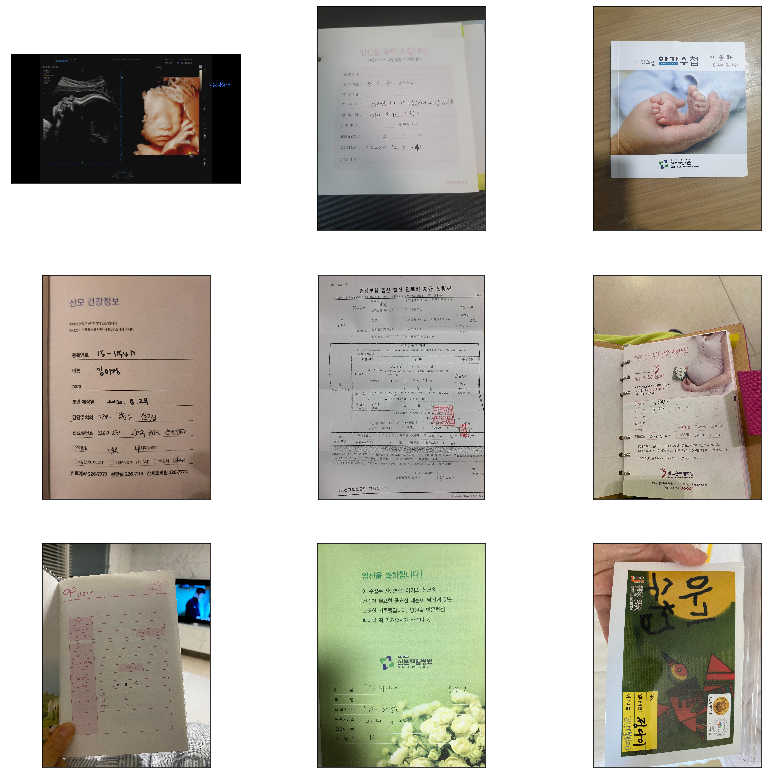

In [130]:
# img1_url = 'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/e35/56215361_2254895454553342_4044900533307601729_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=dK0bkhPFQhkAX_mbltC&oh=bdeb721c7358e08e6c72b99b1605a24a&oe=5E3AF8B4'
# img1_url = df['IMG_URL'][2]  # png확장자
# img1 = io.imread(img1_url)
plt.figure(figsize=(14,14))
plt.subplot(3,3,1); plt.imshow(image_read(df['IMG_URL'][2])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,2); plt.imshow(image_read(df['IMG_URL'][12])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,3); plt.imshow(image_read(df['IMG_URL'][22])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,4); plt.imshow(image_read(df['IMG_URL'][32])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,5); plt.imshow(image_read(df['IMG_URL'][42])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,6); plt.imshow(image_read(df['IMG_URL'][52])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,7); plt.imshow(image_read(df['IMG_URL'][62])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,8); plt.imshow(image_read(df['IMG_URL'][72])); plt.xticks([]); plt.yticks([])
plt.subplot(3,3,9); plt.imshow(image_read(df['IMG_URL'][82])); plt.xticks([]); plt.yticks([])

plt.show()

## 3.detect labels
+ 설명 : 이미지에 포함된 `사물`을 확인한다(단, 사물의 위치는 표기하지 않음)

In [96]:
# 원격
def detect_labels_uri(uri):
    """Detects labels in the file located in Google Cloud Storage or on the Web."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.label_detection(image=image)
    labels = response.label_annotations
    text = []
    for label in labels:
        text.append(label.description)
    return text


In [131]:
URL = df['IMG_URL']
img_detected = []
for img_url in URL:
    img_detected.append(detect_labels_uri(img_url))

for i in range(0, len(img_detected)):
    df['IMG_RESULT'][i] = img_detected[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [133]:
df.tail()

,CUSTOMERNO,IMG_URL,IMG_RESULT
81,2006110800423,https://www.maeili.com/upload/motherbox/certif...,"[Text, Font, Furniture]"
82,1101060800343,https://www.maeili.com/upload/motherbox/certif...,[Comfort food]
83,1811080800424,https://www.maeili.com/upload/motherbox/certif...,"[Text, Font]"
84,1707200800346,https://www.maeili.com/upload/motherbox/certif...,"[Text, Font, Paper, Paper product, Ticket, Doc..."
85,2005290800136,https://www.maeili.com/upload/motherbox/certif...,"[Text, Line, Font, Design, Parallel]"


### 3-2. 문서감지(원격)

In [43]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()

URL = df['IMG_URL']
text_detected = []
for img_url in URL:
    image.source.image_uri = img_url
    response = client.document_text_detection(image=image)
    try:
        text_detected.append(response.text_annotations[0].description)
    except:
        text_detected.append('')

In [44]:
df['Text_RESULT'] = ''
for i in range(0, len(text_detected)):
    df['Text_RESULT'][i] = text_detected[i].replace('\n', ' ')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
df.head()

,CUSTOMERNO,IMG_URL,Text_RESULT
0,2004210800355,https://www.maeili.com/upload/motherbox/certif...,
1,2006010800481,https://www.maeili.com/upload/motherbox/certif...,11:09 7 < 190546172 241 3:03 편집 SEOUL WOMEN's ...
2,2006010800498,https://www.maeili.com/upload/motherbox/certif...,SAMSUNG ETTE SC CHEIL OB/GY CLINIC 10 Tib 0.1 ...
3,1502040800021,https://www.maeili.com/upload/motherbox/certif...,우리아기 태어난 날 성 성 명 성별 김민정 / 양 남미여ㅂ 2020 년 5월 22일...
4,1710050800300,https://www.maeili.com/upload/motherbox/certif...,검색l 오후 10:06 18% 0 Mother's Diary mother's Dia...


### 4.결과 저장

In [46]:
# Excel save
name = '200616_maeili_IMG_add_text.xlsx'
writer = pd.ExcelWriter(name)
df.to_excel(writer, 'Sheet1')
writer.save()

## #.object-localization
+ 설명 : `사물` 및 그 `위치`를 확인한다(detect-labels 보다 발견되는 내용은 작음)

In [30]:
def localize_objects_uri(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    image = vision.types.Image()
    image.source.image_uri = uri

    objects = client.object_localization(
        image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

In [31]:
localize_objects_uri(img1_url)

Number of objects found: 1

Packaged goods (confidence: 0.8826459050178528)
Normalized bounding polygon vertices: 
 - (0.08354400843381882, 0.0239225085824728)
 - (0.8671166896820068, 0.0239225085824728)
 - (0.8671166896820068, 0.99137282371521)
 - (0.08354400843381882, 0.99137282371521)


In [32]:
localize_objects_uri(img2_url)

Number of objects found: 1

Packaged goods (confidence: 0.8385968804359436)
Normalized bounding polygon vertices: 
 - (0.10974785685539246, 0.028390875086188316)
 - (0.7135946750640869, 0.028390875086188316)
 - (0.7135946750640869, 0.9541881084442139)
 - (0.10974785685539246, 0.9541881084442139)


In [9]:
img2_url = df['IMG_URL'].values[77]

In [8]:
# application
def localize_objects_uri_image(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    objects = client.object_localization(image=image).localized_object_annotations
    
    resp = io.imread(uri)
    r, g, b = cv2.split(resp)   # img파일을 b,g,r로 분리
    resp = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
    height, width, channels = resp.shape

    for object_ in objects:
        for vertex in object_.bounding_poly.normalized_vertices:
            # jason pasing 부분이(항상) 가장 어려웠다 : 특정 자료만 가져오는 경우
            start_x, start_y = object_.bounding_poly.normalized_vertices[0].x, object_.bounding_poly.normalized_vertices[0].y
            end_x, end_y = object_.bounding_poly.normalized_vertices[2].x, object_.bounding_poly.normalized_vertices[2].y
            resp = cv2.rectangle(resp, 
                     (int(round(start_x*width,0)), int(round(start_y*height,0))), 
                     (int(round(end_x*  width,0)), int(round(end_y  *height,0))), 
                     (0,255,0), 3)
            resp = cv2.putText(resp, object_.name, (int(round(start_x*width,0)), int(round(start_y*height,0))), 
                   cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)

    plt.figure(figsize=(15,15))
#     plt.subplot(221)
    plt.imshow(resp)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    print(object_.name)

1D barcode


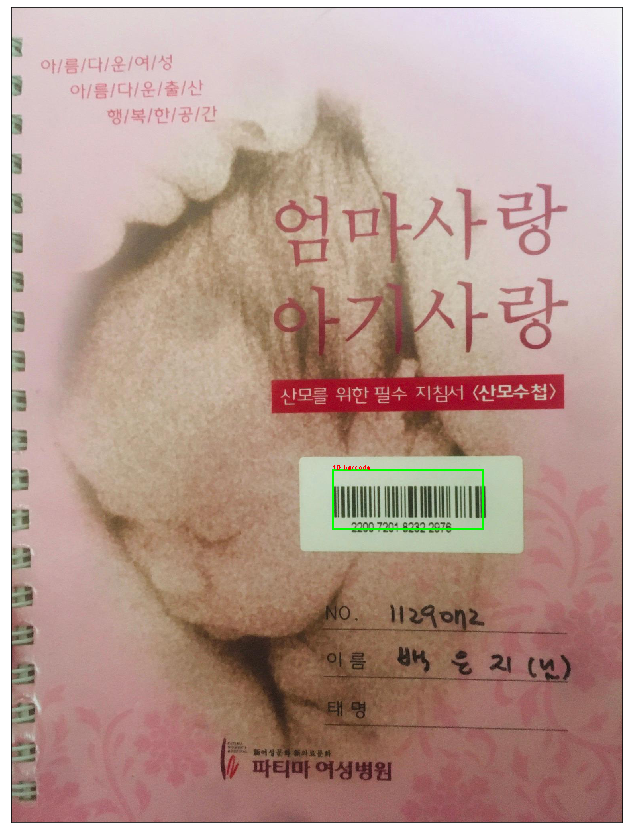

In [11]:
localize_objects_uri_image(img2_url)

Packaged goods


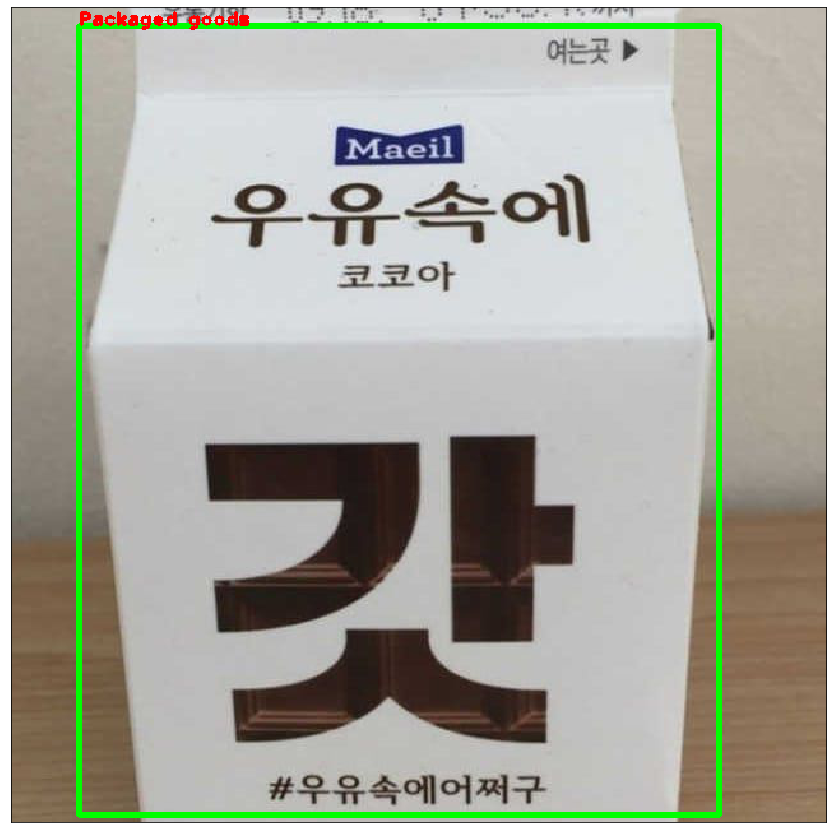

In [35]:
localize_objects_uri_image(img1_url)

Packaged goods


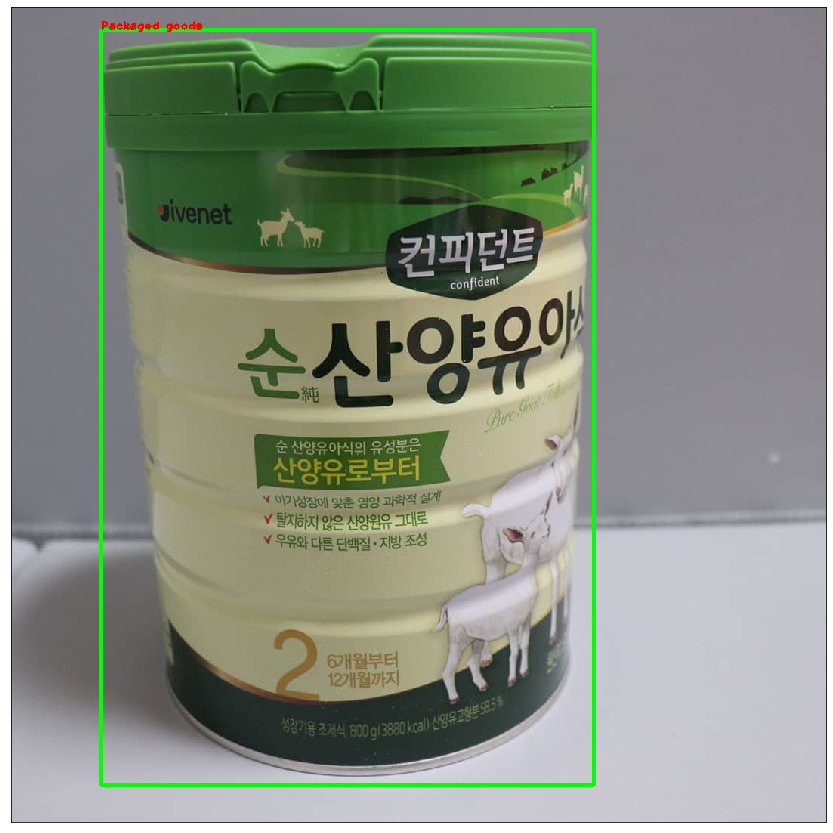

In [36]:
localize_objects_uri_image(img2_url)

## note 실행 : web_detect


In [50]:
#원본 

def detect_labels_uri(uri):
    """Detects labels in the file located in Google Cloud Storage or on the
    Web."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.label_detection(image=image)
    labels = response.label_annotations
    text = []
    for label in labels:
        text.append(label.description)
    return text
#     print('Labels:')
    



In [51]:
detect_labels_uri(img1_url)

[]

In [56]:
detect_labels_uri(img3_url)

Labels:
Text
Nose


### 텍스트감지(원격)

In [12]:
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    print('Texts:')
    print(response.text_annotations[1].description)
    print(response.text_annotations[1].bounding_poly.vertices[0].x, response.text_annotations[1].bounding_poly.vertices[0].y)
    print(response.text_annotations[1].bounding_poly.vertices[2])

In [13]:
detect_text_uri(img2_url)

Texts:
아
74 134
x: 113
y: 170



In [14]:
def detect_text_url(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    resp = io.imread(uri)
    r, g, b = cv2.split(resp)   # img파일을 b,g,r로 분리
    resp = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
    height, width, channels = resp.shape
    
    for i in range(1,len(response.text_annotations)-1):
        object_ = response.text_annotations[i]
        for vertex in object_.description:
#             # jason pasing 부분이(항상) 가장 어려웠다 : 특정 자료만 가져오는 경우
            start_x, start_y = object_.bounding_poly.vertices[0].x, object_.bounding_poly.vertices[0].y
            end_x, end_y = object_.bounding_poly.vertices[2].x, object_.bounding_poly.vertices[2].y
            resp = cv2.rectangle(resp, 
                     (int(round(start_x, 0)), int(round(start_y, 0))), 
                     (int(round(end_x  , 0)), int(round(end_y  , 0))), 
                     (0,255,0), 3)
            resp = cv2.putText(resp, object_.description, (int(round(start_x, 0)), int(round(start_y, 0))), 
                   cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)

    plt.figure(figsize=(15,15))
    plt.imshow(resp)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금


In [16]:
img3_url = df['IMG_URL'].values[78]

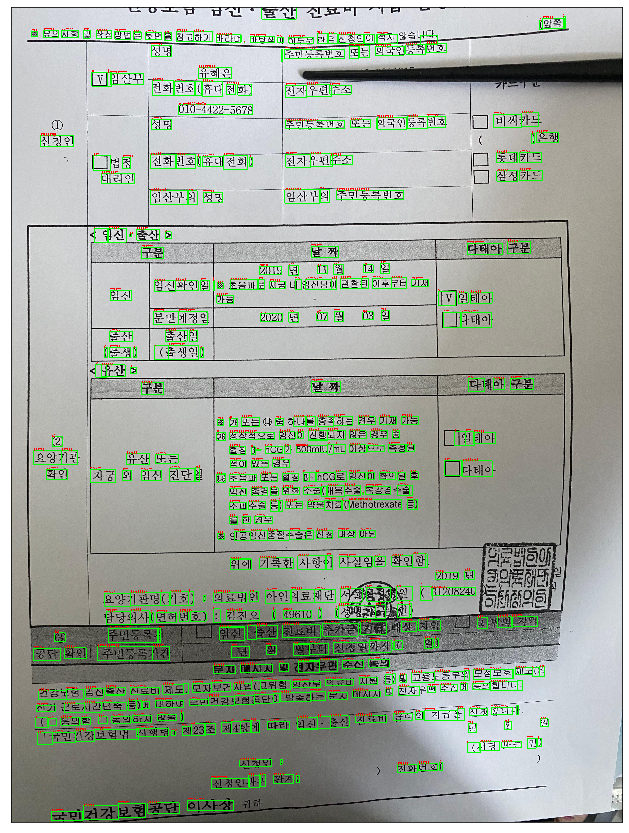

In [17]:
detect_text_url(img3_url)

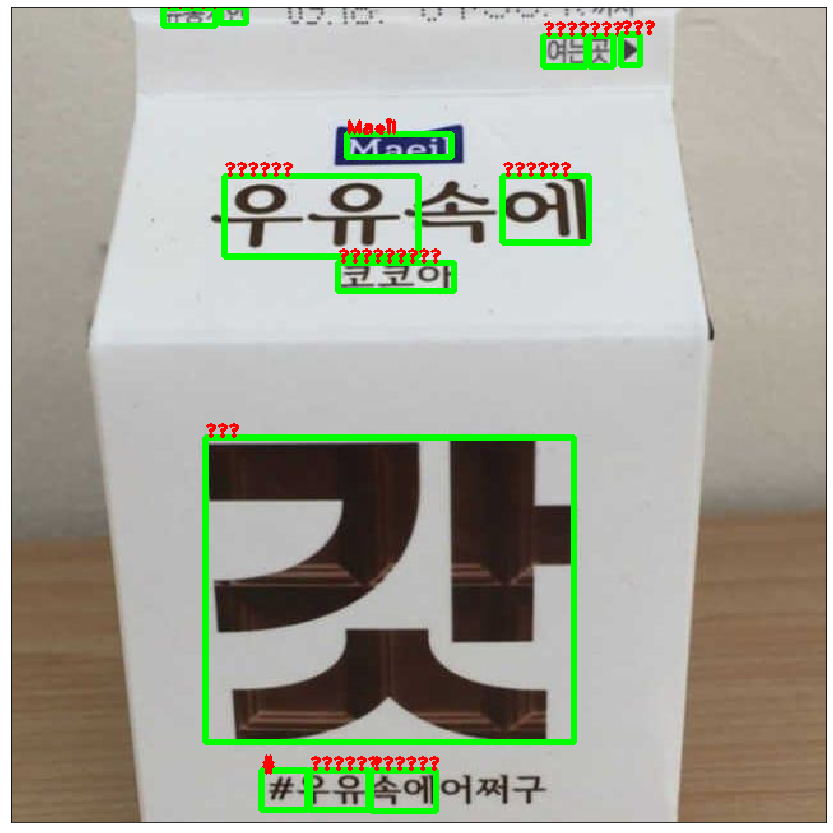

In [10]:
detect_text_url(img1_url)

In [174]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img1_url

response = client.text_detection(image=image)
texts = response.text_annotations[0]

try:
    word = texts[0].description.split('\n')[:-1]
except : 
    pass

print(len(word))

7


In [182]:
word

['유동기한', '여는곳 ▶', 'Maeil', '우유속에', '코코아', '갓', '#우유속에어쩌구']

13

In [19]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img3_url

response = client.text_detection(image=image)
texts = response.text_annotations
word =[]

try:
    word = texts[0].description.split('\n')[:-1]
    print(word)
except : 
    pass

['출산', '(앞쪽)', '※ 유의사항 및 작성방법은 뒷면을 참고하이 바라며, 바탕색이 어두운 란은 신청인이 석시 .', '성명', '|주민등록번호 또포는 외국인등록번호', 'M]임산부', '유혜은', '전화번호(휴대전화)', '전자우편주소', '010-4422-5678', '비씨카드', ')은행', '성명', '주민등록번호 또는 외국인등록번호', '신청인', '전화번호(휴대전화)', '전자우편주소', '롯데카드', '■법정', '대리인', '삼성카드', '임산부의 성명', '임산부의 주민등록번호', '< 임신· 출산 >', '구분', '날짜', '다태아 구분', '2019 년', '11 월', '14 일', '임신확인일 | ※ 초음파로 자궁 내 임신낭이 관찰된 이후부터 기재', '임신', 'V일태아', '가능', '분만예정일', '2020 년', '07 월', '03 일', '■다태아', '출산', '출산일', '(출생)', '(출생일)', '< 유산 >', '구분', '날짜', '다테아 구분', '※ @ 또는 중 하나를 충족하는 경우 기재 가능', '@ 정상적으로 임신이 진행되지 않은 경우 중', '혈청 B-hCG가 500mlU/mL 이상으로 측정된', '(2', '|일태아', '요양기관', '유산 또는', '적이 있는 경우', '□다태아', '확인', '자궁 외 임신 진단일', '나 초음파 또는 혈청 B-hCG로 임신이 확인된 후', '임신 종결을 위한 수술(개복수술,복강경 수술,', '소파수술 등) 또는 약물치료(Methotrexate 등)', '를 한 경우', '※ 인공임신중절수술은 신청 대상 아님', '위에 기록한 사항이 사실임을 확인함.', '2019 년', '적 원 ( 31208240', '요양기관명(기호) : 의료법인 아인의료재단 서월', '담당의사(면허번호) : 김진오 (49610 ) (성과에 신)', '주민등록지', '그 밖의 지역', '임신 · 출산 진료비 추가금 지효대상 지역', '년 월', '문자 메시지 및 전자우편 수신 동의', '

In [48]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img2_url

response = client.text_detection(image=image)
texts = response.text_annotations

if len(texts) > 1:
    print(texts[0].description)
else:
    print('0')    


aivenet
컨피던트
confident
순산양유아
Rere Sar Fd
순 산양유아식의 유성분은
산양유로부터
Y 아가성장에 맞춘 영양 과학적 설계
V 탈지하지 않은 산양원유 그대로
< 우유와 다른 단백질· 지방 조성
2
6개월부터
12개월까지
성장기용 조제식 800g(3880kcal) 산양유교형분 585 %



In [146]:
texts

[]

### 문서감지(원격)

In [22]:
def detect_document_url(uri):
    """Detects document features in the file located in Google Cloud
    Storage."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

#                     for symbol in word.symbols:
#                         print('\tSymbol: {} (confidence: {})'.format(
#                             symbol.text, symbol.confidence))

In [24]:
img3_url

'https://www.maeili.com/upload/motherbox/certification/20200611/thum/9a3c0aac-0970-451b-aba8-eb3b4314f9eb.jpeg'

In [23]:
detect_document_url(img3_url)


Block confidence: 0.9200000166893005

Paragraph confidence: 0.9200000166893005
Word text: 출산 (confidence: 0.6899999976158142)
Word text: ※ (confidence: 0.949999988079071)
Word text: 유의 (confidence: 0.9800000190734863)
Word text: 사항 (confidence: 0.9100000262260437)
Word text: 및 (confidence: 0.9800000190734863)
Word text: 작성 (confidence: 0.9399999976158142)
Word text: 방법 (confidence: 0.8999999761581421)
Word text: 은 (confidence: 0.9100000262260437)
Word text: 뒷면 (confidence: 0.6399999856948853)
Word text: 을 (confidence: 0.9900000095367432)
Word text: 참고 (confidence: 0.9800000190734863)
Word text: 하기 (confidence: 0.9800000190734863)
Word text: 바라며 (confidence: 0.8399999737739563)
Word text: , (confidence: 0.9900000095367432)
Word text: 바탕색 (confidence: 0.9700000286102295)
Word text: 이 (confidence: 0.9900000095367432)
Word text: 어두운 (confidence: 0.9800000190734863)
Word text: 란 (confidence: 0.8399999737739563)
Word text: 은 (confidence: 0.6899999976158142)
Word text: 신청인 (confidence: 0.930

In [14]:
detect_document_url(img1_url)


Block confidence: 0.8999999761581421

Paragraph confidence: 0.8999999761581421
Word text: 유통기한 (confidence: 0.8999999761581421)
	Symbol: 유 (confidence: 0.9700000286102295)
	Symbol: 통 (confidence: 0.8199999928474426)
	Symbol: 기 (confidence: 0.9100000262260437)
	Symbol: 한 (confidence: 0.9300000071525574)

Block confidence: 0.5099999904632568

Paragraph confidence: 0.5099999904632568
Word text: 13 (confidence: 0.5699999928474426)
	Symbol: 1 (confidence: 0.38999998569488525)
	Symbol: 3 (confidence: 0.7599999904632568)
Word text: . (confidence: 0.25)
	Symbol: . (confidence: 0.25)
Word text: 1 (confidence: 0.6499999761581421)
	Symbol: 1 (confidence: 0.6499999761581421)

Block confidence: 0.699999988079071

Paragraph confidence: 0.699999988079071
Word text: . (confidence: 0.09000000357627869)
	Symbol: . (confidence: 0.09000000357627869)
Word text: . (confidence: 0.6200000047683716)
	Symbol: . (confidence: 0.6200000047683716)
Word text: 끼시 (confidence: 0.8399999737739563)
	Symbol: 끼 (confiden

In [25]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = img3_url

response = client.document_text_detection(image=image)
response.text_annotations[0].description

In [26]:
response.text_annotations[0].description

'출산\n※ 유의사항 및 작성방법은 뒷면을 참고하기 바라며, 바탕색이 어두운 란은 신청인이 적지 않습니다.\n성 명\n(앞쪽)\n| 주민등록번호 또는 외국인등록번호\n유혜은\n임산부\n전화번호(휴대전화)\n가드\n전자우편주소\n010-4422-5678\n성 명\n주민등록번호 또는 외국인등록번호\n10\n신청인\n(\n비씨카드\n)은행\n롯데카드\n삼성카드\n전화번호(휴대전화)\n전자우편주소\n그법정\n대리인\n임산부의 성명\n임산부의 주민등록번호\n다태아 구분\n< 임신·출산 >\n구분\n날짜\n2019 년 11 월 14일\n임신확인일 | ※ 초음파로 자궁 내 임신낭이 관찰된 이후부터 기재\n임신\n가능\n분만예정일\n2020 년 07 월 03 일\n출산 출산일\n(출생) (출생일)\n< 유산 >\n구분\n날짜\ny[일태아\n다태아\n다태아 구분\n일태아\n(2)\n요양기관\n확인\n유산 또는\n자궁 외 임신 진단일\n다태아\n※ ㉮ 또는 중 하나를 충족하는 경우 기재 가능\n정상적으로 임신이 진행되지 않은 경우 중\n혈청 B- hCG가 500mlU/mL 이상으로 측정된\n적이 있는 경우\nQ 초음파 또는 혈청 B- hCG로 임신이 확인된 후\n임신 종결을 위한 수술(개복수술, 복강경수술,\n소파수술 등) 또는 약물치료 (Methotrexate 등)\n를 한 경우\n※ 인공임신중절수술은 신청 대상 아님\n위에 기록한 사항이 사실임을 확인함. 의로 이\n2019 년 하의\n요양기관명(기호) : 의료법인 아인의료재단 서성원 ( 31208240\n담당의사(면허번호) : 김진오 ( 49610 ) (성병)\n565\n(3)\n주민등록지\n임신·출산 진료비 추가금 지그 대상 지역 그 밖의 지역\n공단 확인 주민등록기간\n년 월 일부터 신청일까지(일)\n문자 메시지 및 전자우편 수신 동의\n건강보험 임신출산 진료비 제도, 모자보건사업(고위험 임산부 의료비 지원 등) 및 고용노동부의 모성보호 제도(임\n신기 근로시간단축 등)에 대하여 국민건강보험공단이 발송하는 문자 메시지 

In [38]:
for i in range(1,len(response.text_annotations)):
    print(response.text_annotations[i].description)

유통기한
13
.
1
.
.
끼시
여는
곳
▶
Maeil
우유속에
코코아
#
우유속에어쩌구
